In [145]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [137]:
w = torch.tensor(1., requires_grad = True)
x = torch.tensor([1,2,3,4,5])
y = torch.tensor([2,4,6,8,10])


In [125]:
def loss(y, y_hat):
    return torch.sqrt(torch.sum(y-y_hat)**2)

In [126]:
y_hat = x*w
y_hat

tensor([1., 2., 3., 4., 5.], grad_fn=<MulBackward0>)

In [127]:
l = loss(y, y_hat)
l.backward()

In [128]:
w.grad

tensor(-15.)

In [129]:
eporchs = 20
lr = 0.01
for eporch in range(eporchs):
    y_hat = x*w
    l = loss(y, y_hat)
    l.backward()
    with torch.no_grad():
        w -= lr*w.grad
    w.grad.zero_()
    print('loss: ', float(1), '| w:', float(w))

loss:  1.0 | w: 1.2999999523162842
loss:  1.0 | w: 1.4499999284744263
loss:  1.0 | w: 1.5999999046325684
loss:  1.0 | w: 1.7499998807907104
loss:  1.0 | w: 1.8999998569488525
loss:  1.0 | w: 2.049999952316284
loss:  1.0 | w: 1.899999976158142
loss:  1.0 | w: 2.049999952316284
loss:  1.0 | w: 1.899999976158142
loss:  1.0 | w: 2.049999952316284
loss:  1.0 | w: 1.899999976158142
loss:  1.0 | w: 2.049999952316284
loss:  1.0 | w: 1.899999976158142
loss:  1.0 | w: 2.049999952316284
loss:  1.0 | w: 1.899999976158142
loss:  1.0 | w: 2.049999952316284
loss:  1.0 | w: 1.899999976158142
loss:  1.0 | w: 2.049999952316284
loss:  1.0 | w: 1.899999976158142
loss:  1.0 | w: 2.049999952316284


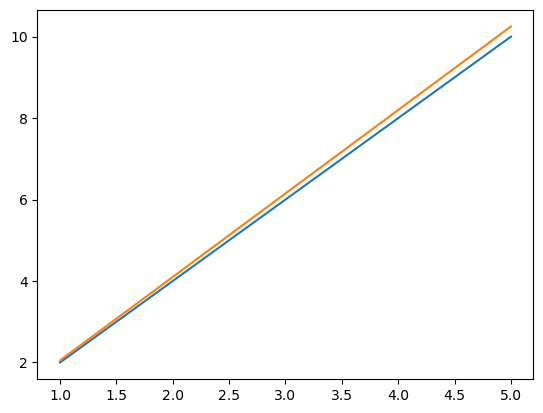

In [130]:
#plt.scatter(x,y)
plt.plot(x,y)
plt.plot(x, x*w.detach().numpy())

In [138]:
def f(x):
    return x**2 - 2*x +1
X =  torch.tensor([[i] for i in torch.linspace(-10,11,100)])
X

tensor([[-10.0000],
        [ -9.7879],
        [ -9.5758],
        [ -9.3636],
        [ -9.1515],
        [ -8.9394],
        [ -8.7273],
        [ -8.5152],
        [ -8.3030],
        [ -8.0909],
        [ -7.8788],
        [ -7.6667],
        [ -7.4545],
        [ -7.2424],
        [ -7.0303],
        [ -6.8182],
        [ -6.6061],
        [ -6.3939],
        [ -6.1818],
        [ -5.9697],
        [ -5.7576],
        [ -5.5455],
        [ -5.3333],
        [ -5.1212],
        [ -4.9091],
        [ -4.6970],
        [ -4.4848],
        [ -4.2727],
        [ -4.0606],
        [ -3.8485],
        [ -3.6364],
        [ -3.4242],
        [ -3.2121],
        [ -3.0000],
        [ -2.7879],
        [ -2.5758],
        [ -2.3636],
        [ -2.1515],
        [ -1.9394],
        [ -1.7273],
        [ -1.5152],
        [ -1.3030],
        [ -1.0909],
        [ -0.8788],
        [ -0.6667],
        [ -0.4545],
        [ -0.2424],
        [ -0.0303],
        [  0.1818],
        [  0.3939],


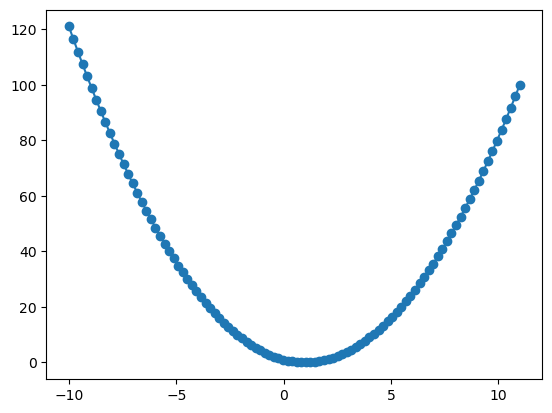

In [132]:
Y = f(X)
plt.scatter(X,Y)
plt.plot(X,Y)

In [139]:
class build_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(1,3)
        self.hidden = nn.Linear(3,4)
        self.output = nn.Linear(4,1)
        
    def forward(self, x):
        x = self.input(x)
        x = nn.ReLU()(x)
        x = self.hidden(x)
        x = nn.ReLU()(x)
        x = self.output(x)
        return x

In [140]:
model = build_model()
model

build_model(
  (input): Linear(in_features=1, out_features=3, bias=True)
  (hidden): Linear(in_features=3, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
)

In [143]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
epochs = 1000
for epoch in range (epochs):
    y_hat = model(X)
    l = loss_fn(y_hat,Y)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    print('epoch:', epoch, '| loss:', float(l))

epoch: 0 | loss: 978.46240234375
epoch: 1 | loss: 970.0282592773438
epoch: 2 | loss: 963.9451293945312
epoch: 3 | loss: 960.0049438476562
epoch: 4 | loss: 957.818603515625
epoch: 5 | loss: 956.8008422851562
epoch: 6 | loss: 956.28466796875
epoch: 7 | loss: 955.720458984375
epoch: 8 | loss: 954.7957763671875
epoch: 9 | loss: 953.4196166992188
epoch: 10 | loss: 951.6450805664062
epoch: 11 | loss: 949.59814453125
epoch: 12 | loss: 947.4247436523438
epoch: 13 | loss: 945.2601318359375
epoch: 14 | loss: 943.2073364257812
epoch: 15 | loss: 941.3258666992188
epoch: 16 | loss: 939.6279907226562
epoch: 17 | loss: 938.080810546875
epoch: 18 | loss: 936.6204833984375
epoch: 19 | loss: 935.1704711914062
epoch: 20 | loss: 933.6629638671875
epoch: 21 | loss: 932.0552978515625
epoch: 22 | loss: 930.335693359375
epoch: 23 | loss: 928.5206909179688
epoch: 24 | loss: 926.6456298828125
epoch: 25 | loss: 924.7507934570312
epoch: 26 | loss: 922.8727416992188
epoch: 27 | loss: 921.0335083007812
epoch: 28 | 

epoch: 254 | loss: 495.904541015625
epoch: 255 | loss: 494.99847412109375
epoch: 256 | loss: 494.1051025390625
epoch: 257 | loss: 493.2191162109375
epoch: 258 | loss: 492.3348693847656
epoch: 259 | loss: 491.37054443359375
epoch: 260 | loss: 490.4068603515625
epoch: 261 | loss: 489.4503479003906
epoch: 262 | loss: 488.5053405761719
epoch: 263 | loss: 487.5615234375
epoch: 264 | loss: 486.6192321777344
epoch: 265 | loss: 485.6795959472656
epoch: 266 | loss: 484.7427978515625
epoch: 267 | loss: 483.8022766113281
epoch: 268 | loss: 482.8631896972656
epoch: 269 | loss: 481.927734375
epoch: 270 | loss: 480.87554931640625
epoch: 271 | loss: 479.7956237792969
epoch: 272 | loss: 478.7180480957031
epoch: 273 | loss: 477.6289978027344
epoch: 274 | loss: 476.5311584472656
epoch: 275 | loss: 475.4259338378906
epoch: 276 | loss: 474.3153076171875
epoch: 277 | loss: 473.1991882324219
epoch: 278 | loss: 471.93878173828125
epoch: 279 | loss: 470.5931701660156
epoch: 280 | loss: 469.2231140136719
epoch

epoch: 498 | loss: 24.716516494750977
epoch: 499 | loss: 24.468097686767578
epoch: 500 | loss: 24.221481323242188
epoch: 501 | loss: 23.97693634033203
epoch: 502 | loss: 23.736848831176758
epoch: 503 | loss: 23.49951171875
epoch: 504 | loss: 23.265165328979492
epoch: 505 | loss: 23.032651901245117
epoch: 506 | loss: 22.790578842163086
epoch: 507 | loss: 22.543806076049805
epoch: 508 | loss: 22.29693031311035
epoch: 509 | loss: 22.049785614013672
epoch: 510 | loss: 21.802560806274414
epoch: 511 | loss: 21.556943893432617
epoch: 512 | loss: 21.31269073486328
epoch: 513 | loss: 21.070354461669922
epoch: 514 | loss: 20.82927894592285
epoch: 515 | loss: 20.590452194213867
epoch: 516 | loss: 20.3543643951416
epoch: 517 | loss: 20.122459411621094
epoch: 518 | loss: 19.89439582824707
epoch: 519 | loss: 19.66871452331543
epoch: 520 | loss: 19.446245193481445
epoch: 521 | loss: 19.22662925720215
epoch: 522 | loss: 19.011676788330078
epoch: 523 | loss: 18.82321548461914
epoch: 524 | loss: 18.6027

epoch: 750 | loss: 3.6850812435150146
epoch: 751 | loss: 3.694582462310791
epoch: 752 | loss: 3.6801440715789795
epoch: 753 | loss: 3.662947416305542
epoch: 754 | loss: 3.663363456726074
epoch: 755 | loss: 3.65861439704895
epoch: 756 | loss: 3.637485980987549
epoch: 757 | loss: 3.6338720321655273
epoch: 758 | loss: 3.6308188438415527
epoch: 759 | loss: 3.6180615425109863
epoch: 760 | loss: 3.6070868968963623
epoch: 761 | loss: 3.603154182434082
epoch: 762 | loss: 3.597456693649292
epoch: 763 | loss: 3.5837841033935547
epoch: 764 | loss: 3.5783069133758545
epoch: 765 | loss: 3.573742389678955
epoch: 766 | loss: 3.5634753704071045
epoch: 767 | loss: 3.5552687644958496
epoch: 768 | loss: 3.5498147010803223
epoch: 769 | loss: 3.543414831161499
epoch: 770 | loss: 3.5337023735046387
epoch: 771 | loss: 3.5272436141967773
epoch: 772 | loss: 3.5219521522521973
epoch: 773 | loss: 3.513247489929199
epoch: 774 | loss: 3.5060129165649414
epoch: 775 | loss: 3.499886989593506
epoch: 776 | loss: 3.493

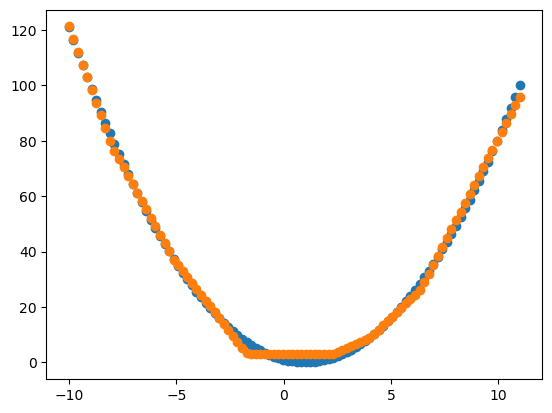

In [144]:
plt.scatter(X,Y)
plt.scatter(X,model(X).detach().numpy());